# Test the 1D and 2D PSD calculations

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from monolithic.io import read_zygo_binary
from monolithic.plot import show_surface_map
from monolithic.math import remove_surface, psd_1d, rmse

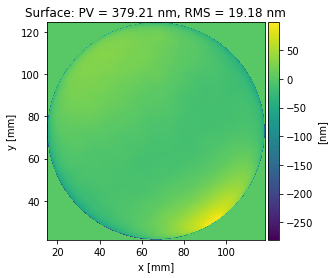

In [2]:
# 1. Load the surface error map
_, _, _, X, Y, Z = read_zygo_binary('../data/zygo_test.dat')
Z, _, _, _ = remove_surface(X, Y, Z)
Z[np.isnan(Z)] = 0
show_surface_map(X, Y, Z, colormap='viridis')

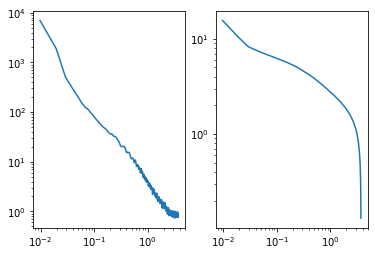

In [6]:
# 2. calculate 1D PSD of the center line
pixel_size = np.median(np.diff(X[1, :]))
q, cq_1d, int_cq_1d = psd_1d(Z, pixel_size=pixel_size, dim='x', win_type='hann')

_, ax = plt.subplots(1, 2)
ax[0].loglog(q * 1e-3, cq_1d * 1e21)
ax[1].loglog(q * 1e-3, int_cq_1d * 1e9)
plt.show()